In [44]:
%reset

Nothing done.


In [45]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
#import Nio
#print (Nio.__version__)
import sklearn

print("python version:")
import platform
print(platform.python_version())

python version:
3.7.4


In [46]:
sstdat = xr.open_dataset('http://apdrc.soest.hawaii.edu/dods/public_data/NOAA_SST/ERSST/monthly_v5')
#sstdat
sst = sstdat['sst']
sst

<xarray.DataArray 'sst' (time: 2004, lat: 89, lon: 180)>
[32104080 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-12-01
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:  extended reconstructed sea surface temperature [degree c]

In [47]:
slpdat = xr.open_dataset('/Users/home/All-IndiaRainfall/data/slp.2019.nc')
slpdat
slp = slpdat['slp']

/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'slp' has multiple fill values {-99, 32767}, decoding all values to NaN.
  use_cftime=use_cftime,


In [48]:
precipdat = xr.open_dataset('/Users/home/All-IndiaRainfall/data/pALLIN_1900-1988_1900-1988.nc', decode_times=False)
precipdat
time = pd.date_range('1900-01-01', freq='M', periods=1068)
precip = xr.Dataset({'data': ('data', precipdat['precip']), 'time': time, 'foo': ('int', np.arange(1068))})
precip

<xarray.Dataset>
Dimensions:  (data: 1068, int: 1068, time: 1068)
Coordinates:
  * data     (data) float32 15.3 6.7 10.3 38.5 40.6 ... 205.6 50.2 22.5 10.2
  * time     (time) datetime64[ns] 1900-01-31 1900-02-28 ... 1988-12-31
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1061 1062 1063 1064 1065 1066 1067

In [49]:
#EP-ENSOpredictor

'''set #1'''
latrange1 = sst.sel(lat = slice(-20, 5)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst.sel(lat = slice(-20, 5), lon = slice(150, 170), time = (sst['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('2019-03-01', '2019-03-31'))

marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst.sel(lat = slice(-20, 5), lon = slice(150, 170), time = (sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('2019-05-01', '2019-05-31'))

maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

DSST1 = maymean1.mean() - marchmean1.mean()


'''set #2'''
latrange2 = sst.sel(lat = slice(-10, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst.sel(lat = slice(-10, 10), lon = slice(250, 280), time = (sst['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('2019-03-01', '2019-03-31'))

marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = sst.sel(lat = slice(-10, 10), lon = slice(250, 280), time = (sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('2019-05-01', '2019-05-31'))

maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

DSST2 = (maymean2.mean() - marchmean2.mean())


EPTmean = -0.036233
EPT = (DSST1 - DSST2) - EPTmean
EPTstd = 0.546494
EPT = EPT / EPTstd
EPT

<xarray.DataArray ()>
array(-0.10832843)

In [50]:
#CP-ENSOpredictor

'''set #1'''
latrange1= sst.sel(lat = slice(-25, -10)).lat
weights1= np.cos(latrange1*np.pi/180)

aprildata1= sst.sel(lat = slice(-25, -10), lon = slice(170, 200), time = (sst['time.month']==4))
aprilSST1= aprildata1.sel(time = slice('2019-04-01', '2019-04-30'))

aprilmean1= (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1= sst.sel(lat = slice(-25, -10), lon = slice(170, 200), time = (sst['time.month']==5))
maySST1= maydata1.sel(time = slice('2019-05-01', '2019-05-31'))

maymean1= (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

DSST1 = maymean1.mean() - aprilmean1.mean()
#DSST1


'''set #2'''
latrange2= sst.sel(lat = slice(5, 20)).lat
weights2= np.cos(latrange2*np.pi/180)

aprildata2= sst.sel(lat = slice(5, 20), lon = slice(180, 210), time = (sst['time.month']==4))
aprilSST2= aprildata2.sel(time = slice('2019-04-01', '2019-04-30'))

aprilmean2= (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2= sst.sel(lat = slice(5, 20), lon = slice(180, 210), time = (sst['time.month']==5))
maySST2= maydata2.sel(time = slice('2019-05-01', '2019-05-31'))

maymean2= (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

DSST2 = maymean2.mean() - aprilmean2.mean()

CPTmean = -1.087295
CPT = (DSST1 - DSST2) - CPTmean
CPTstd = 0.243743
CPT = CPT / CPTstd
print(CPT)

<xarray.DataArray ()>
array(-0.9477979)


In [51]:
#mega-ENSOpredictor

'''set #1'''
latrange1 = slp.sel(lat = slice(-10, -40)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==4))
aprilSLP1 = aprildata1.sel(time = slice('2019-04-01', '2019-04-30'))

aprilmean1 = (aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==5))
maySLP1 = maydata1.sel(time = slice('2019-05-01', '2019-05-31'))

maymean1 = (maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean()

NP = ((aprilmean1.mean() + maymean1.mean())/2)

'''set#2'''
latrange2 = slp.sel(lat = slice(30, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('2019-04-01', '2019-04-30'))

aprilmean2 = (aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==5))
maySLP2 = maydata2.sel(time = slice('2019-05-01', '2019-05-31'))

maymean2 = (maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean()

SP = ((aprilmean2.mean() + maymean2.mean())/2)


NParea = (30*weights1.mean() * 60)
SParea = (20*weights2.mean() * 50)
PSHtemp = ((NP * NParea) + (SP * SParea))/(NParea + SParea)

PSHmean = 1015.898018
temp = PSHtemp - PSHmean
PSHstd = 0.430541
PSH = temp / PSHstd
print (PSH)

<xarray.DataArray ()>
array(0.8958397)


In [52]:
#AnomalousAsianLowpredictor

latrange = slp.sel(lat = slice(60, 40)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==3))
marchSLP = marchdata.sel(time = slice('2019-03-01', '2019-03-31'))

marchmean = (marchSLP*weights).mean({'lon', 'lat'})/weights.mean()

maydata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==5))
maySLP = maydata.sel(time = slice('2019-05-01', '2019-05-31'))

maymean = (maySLP*weights).mean({'lon', 'lat'})/weights.mean()

NATmean = -12.909709
NATtemp = (maymean.mean() - marchmean.mean()) - NATmean
NATstd = 1.648686
NAT = NATtemp / NATstd
print(NAT)

<xarray.DataArray ()>
array(1.99020917)


In [53]:
#precipiation

junenumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)
#print precip.data[junenumber]

junedata = precip.sel(time = precip['time.month']==6, int = junenumber)
junePRECIP = junedata.data[junenumber]
#print junePRECIP

julynumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)
#print precip.data[julynumber]

julydata = precip.sel(time = precip['time.month']==7, int = julynumber)
julyPRECIP = julydata.data[julynumber]
#print julyPRECIP

augustnumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 8):
        augustnumber.append(x)
#print precip.data[augustnumber]

augustdata = precip.sel(time = precip['time.month']==8, int = augustnumber)
augustPRECIP = augustdata.data[augustnumber]
#print augustPRECIP

septembernumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 9):
        septembernumber.append(x)
#print precip.data[septembernumber]

septemberdata = precip.sel(time = precip['time.month']==9, int = septembernumber)
septemberPRECIP = septemberdata.data[septembernumber]
#print septemberPRECIP

#junePRECIP = precip.sel(time = precip['time.month']==6)
#julyPRECIP = precip.sel(time = precip['time.month']==7)
#augustPRECIP = precip.sel(time = precip['time.month']==8)
#septemberPRECIP = precip.sel(time = precip['time.month']==9)


#junePRECIP.time.data = septemberPRECIP.time.data
#julyPRECIP.time.data = septemberPRECIP.time.data
#augustPRECIP.time.data = septemberPRECIP.time.data

rainfall = junePRECIP.data + julyPRECIP.data + augustPRECIP.data + septemberPRECIP.data
rainfall


array([ 889.3    ,  722.     ,  791.80005,  860.8    ,  750.3    ,
        716.4    ,  884.89996,  777.49994,  897.     ,  889.3    ,
        934.89996,  736.30005,  805.80005,  784.4    ,  898.     ,
        780.6    ,  950.6    , 1004.2    ,  650.8    ,  884.5    ,
        719.     ,  865.8    ,  869.     ,  823.     ,  862.6    ,
        803.60004,  902.6    ,  853.     ,  767.7    ,  821.1    ,
        804.4    ,  877.     ,  803.4    ,  975.8    ,  913.39996,
        843.5    ,  908.19995,  841.89996,  908.19995,  789.4    ,
        853.1    ,  728.30005,  957.69995,  868.2001 ,  920.3    ,
        910.80005,  903.60004,  945.3    ,  873.89996,  903.69995,
        876.9    ,  738.8    ,  792.9    ,  922.89996,  885.30005,
        930.     ,  983.2    ,  788.5    ,  889.3    ,  944.1    ,
        839.7    , 1020.2    ,  809.8    ,  857.9    ,  922.5    ,
        709.39996,  739.9    ,  860.1    ,  754.6    ,  831.     ,
        939.8    ,  886.8    ,  652.8    ,  913.4    ,  748.  

In [54]:
AIRI = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT
AIRI

<xarray.DataArray ()>
array(-0.50260303)

847.2865
<xarray.DataArray ()>
array(805.86709619)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([805.36709619, 805.46709619, 805.56709619, 805.66709619,
        805.76709619, 805.86709619, 805.96709619, 806.06709619,
        806.16709619, 806.26709619, 806.36709619]),
 <a list of 10 Patch objects>)

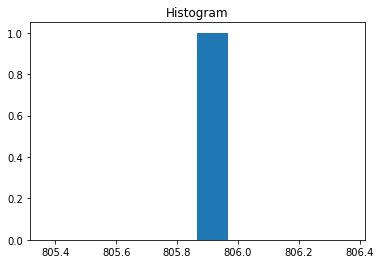

In [61]:
final = AIRI * rainfall.std() + rainfall.mean()
print(rainfall.mean())
print(final)
#AIRIrainfall = final['foo']
final.plot()
# doesn't work well

In [56]:
final

<xarray.DataArray ()>
array(805.86709619)

In [57]:
#data = xr_extras.csv.to_csv('calculated.csv')
    #xr.open_dataset('calculated.csv')
data = pd.read_csv('/Users/home/All-IndiaRainfall/data/calculated_1900-2016.csv')
# xr.open_dataset('calculated.csv')
dataval = data.values
dataval

array([[1920.7       ,  813.4715229 ],
       [1920.75      ,  813.58616951],
       [1920.8       ,  813.50953136],
       ...,
       [2015.9       ,  831.91944467],
       [2015.95      ,  835.85110232],
       [2016.        ,  838.34435786]])

In [58]:
data1 = pd.read_csv('/Users/home/All-IndiaRainfall/data/observed_1900-2015.csv')
dataval1 = data1.values
dataval1

array([[1900.25      ,  837.00742662],
       [1900.3       ,  827.07293161],
       [1900.35      ,  817.82713826],
       ...,
       [2014.9       ,  727.47138274],
       [2014.95      ,  727.57059845],
       [2015.        ,  729.19400069]])

856.3254486032113


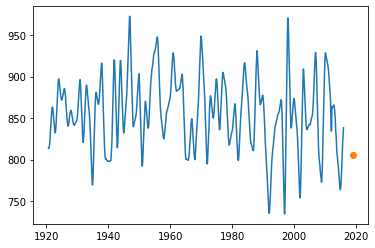

In [59]:
#x = data.columns['1920.70']
#y = data.columns['813.42']
x = plt.plot(dataval[:,0],dataval[:,1])
print(dataval[:,1].mean())
x
plt.plot(2019,final,'o')

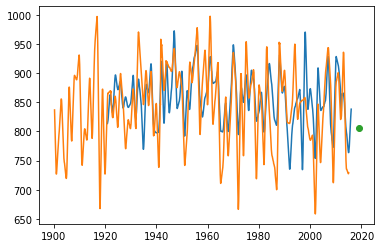

In [60]:
#plt.plot(np.arange(1900,2018,1),(final.data))
plt.plot(dataval[:,0],dataval[:,1])
plt.plot(dataval1[:,0],dataval1[:,1])
plt.plot(2019,final,'o')